<a href="https://colab.research.google.com/github/asai2094/ds-3001/blob/main/ananyashri_sai_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

In [ ]:
! git clone https://www.github.com/DS3001/assignment3

Cloning into 'assignment3'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 14 (delta 2), reused 1 (delta 1), pack-reused 7
Receiving objects: 100% (14/14), 868.21 KiB | 15.79 MiB/s, done.
Resolving deltas: 100% (2/2), done.


**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [ ]:
import numpy as np # Import the numpy package into your workspace
import pandas as pd  # Import the pandas package into your workspace

In [ ]:
#Question 1 part 1:
df = pd.read_csv('./assignment3/data/car_data.csv',low_memory=False)
df.head()
df.describe()
df.shape #row: 1000, col: 5

(1000, 5)

In [ ]:
#Question 1 part 2:
df = pd.read_csv('./assignment3/data/car_data.csv',low_memory=False)
df.head()
df["Gender"].value_counts()
df['User ID'].unique()
df['Purchased'].unique()

#User.ID, Age, AnnualSalary, Purchased, and Gender are all variables that have 1000 counts. User.ID is a numeric that has a mean of 500.5,
#a std of 288.8, min value of 1, and a maximum value of 1000. Age is also a numeric variable that has a mean of 40.10, a std of 10.70,
#a minimum value of 18 and a maximum value of 63. Annual Salary is also a numeric variable that has a mean of $72689, a std of 34488.34, a
#a minimum value of $15000, and a maximum value of $152500. Purchased is a binary numeric variable (0 indicating no purchase and 1 indicating purchase made) with a mean of 0.402, std is 0.49, a minimum value of 0,
#and a maximum value of 1. Gender is a categorical variable that has two types, female and male, wherein there are 516 counts of females and 484 counts of males
df['User ID'+'_nan'] = df["User ID"].isnull()
print('Total Missings: \n', sum(df["User ID"+'_nan']),'\n')

df["Age"+'_nan'] = df["Age"].isnull()
print('Total Missings: \n', sum(df["Age"+'_nan']),'\n')

df["Gender"+'_nan'] = df["Gender"].isnull()
print('Total Missings: \n', sum(df["Gender"+'_nan']),'\n')

df["AnnualSalary"+'_nan'] = df["AnnualSalary"].isnull()
print('Total Missings: \n', sum(df["AnnualSalary"+'_nan']),'\n')

df["Purchased"+'_nan'] = df["Purchased"].isnull()
print('Total Missings: \n', sum(df["Purchased"+'_nan']),'\n')

#There are no missings to clean.

df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

X = df[['Age', 'AnnualSalary']]
y = df['Purchased']

Total Missings: 
 0 

Total Missings: 
 0 

Total Missings: 
 0 

Total Missings: 
 0 

Total Missings: 
 0 



Optimal value of k: 1


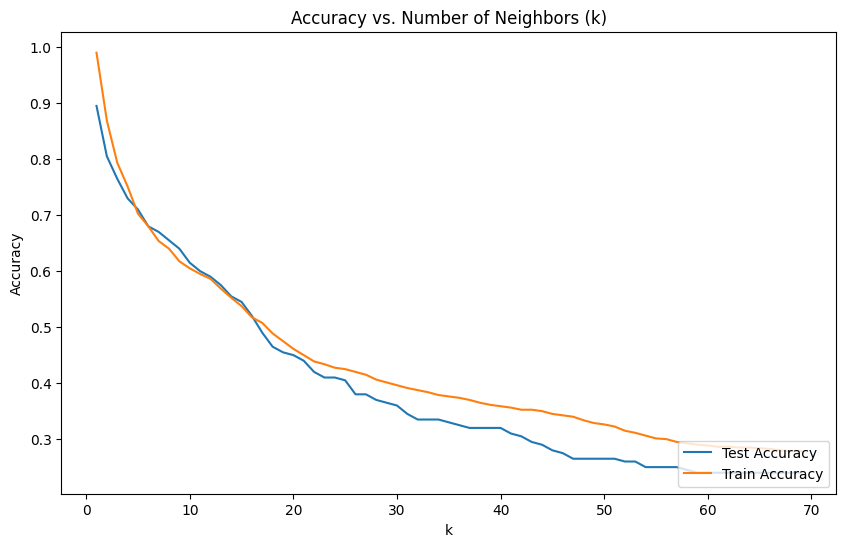

Accuracy:  0.88 

Accuracy for Males:  0.9263157894736842 

Predicted   0   1
Actual           
0          46   6
1           1  42
Accuracy for Females:  0.8476190476190476 

Predicted   0   1
Actual           
0          55  12
1           4  34


<ipython-input-53-25afdde2bb3e>:69: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train_male = X_train[df['Gender'] == 0]
<ipython-input-53-25afdde2bb3e>:71: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_male = X_test[df['Gender'] == 0]
<ipython-input-53-25afdde2bb3e>:88: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train_female = X_train[df['Gender'] == 1]
<ipython-input-53-25afdde2bb3e>:90: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_female = X_test[df['Gender'] == 1]


In [ ]:
#Question 1 part 3, part 4, part 5, part 6, and part 7:

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor as kNNClassifier # Import the kNN classifier tool
df = pd.read_csv('./assignment3/data/car_data.csv',low_memory=False)
df.head()
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
X = df[['Age', 'AnnualSalary']]
y = df['Purchased']
# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)
X = X.apply(maxmin) # max-min normalization
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100) #splitting into 80-20

k_bar = 70
k_grid = np.arange(1, k_bar)
accuracy_test = np.zeros(k_bar-1)
accuracy_train = np.zeros(k_bar-1)

for k in range(1, k_bar):
    model = kNNClassifier(n_neighbors=k)
    fitted_model = model.fit(X_train, y_train)

    y_hat_test = fitted_model.predict(X_test)
    y_hat_train = fitted_model.predict(X_train)

    accuracy_test[k-1] = np.mean(y_test == y_hat_test)
    accuracy_train[k-1] = np.mean(y_train == y_hat_train)

max_accuracy = np.max(accuracy_test)
max_index = np.where(accuracy_test == max_accuracy)
k_star = k_grid[max_index]

print(f"Optimal value of k: {k_star[0]}")

plt.figure(figsize=(10, 6))
plt.plot(k_grid, accuracy_test, label='Test Accuracy')
plt.plot(k_grid, accuracy_train, label='Train Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.show()

#Optimal value of k is 1

## Fit the Model
from sklearn import tree # Import the tree classifier
cart = tree.DecisionTreeClassifier() # Create a classifier object
cart = cart.fit(X_train, y_train) # Fit the classifier

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Confusion Matrix
tab = pd.crosstab(y_test,y_hat, rownames= ['Actual'], colnames = ['Predicted']) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

#Predict a scale when one doesn't occur: tab.iloc[0,1]
#Predict no scale when one does occur: tab.iloc[1,0]
#Overall Accuracy is: 0.875 or 87.5%

# Filter data for males
X_train_male = X_train[df['Gender'] == 0]
y_train_male = y_train[df['Gender'] == 0]
X_test_male = X_test[df['Gender'] == 0]
y_test_male = y_test[df['Gender'] == 0]

# Fit the Model for males
cart_male = tree.DecisionTreeClassifier()
cart_male = cart_male.fit(X_train_male, y_train_male)

# Make Predictions on the Test Set for males
y_hat_male = cart_male.predict(X_test_male)

# Confusion Matrix for males
tab_male = pd.crosstab(y_test_male, y_hat_male, rownames=['Actual'], colnames=['Predicted'])
acc_male = (tab_male.iloc[0,0] + tab_male.iloc[1,1]) / (tab_male.to_numpy().sum())
print('Accuracy for Males: ', acc_male, '\n')


# Filter data for females
X_train_female = X_train[df['Gender'] == 1]
y_train_female = y_train[df['Gender'] == 1]
X_test_female = X_test[df['Gender'] == 1]
y_test_female = y_test[df['Gender'] == 1]

# Fit the Model for females
cart_female = tree.DecisionTreeClassifier()
cart_female = cart_female.fit(X_train_female, y_train_female)

# Make Predictions on the Test Set for females
y_hat_female = cart_female.predict(X_test_female)

# Confusion Matrix for females
tab_female = pd.crosstab(y_test_female, y_hat_female, rownames=['Actual'], colnames=['Predicted'])
acc_female = (tab_female.iloc[0,0] + tab_female.iloc[1,1]) / (tab_female.to_numpy().sum())
print('Accuracy for Females: ', acc_female, '\n')

#The model makes more accurate predictions for males than females (males have a 92.63% accuracy compared to females who have a 84.76% accuracy).
#This could be due to a variety of different reasons - from the data distribution being more favorable towards males (more variable patterns)than females,
#it could also be due to bias in the data itself, or there may be more favorable patterns in the data favoring males than females that are deeprooted in the features of the dataset.

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

Total Missings: 
 0 

Total Missings: 
 0 

Total Missings: 
 0 



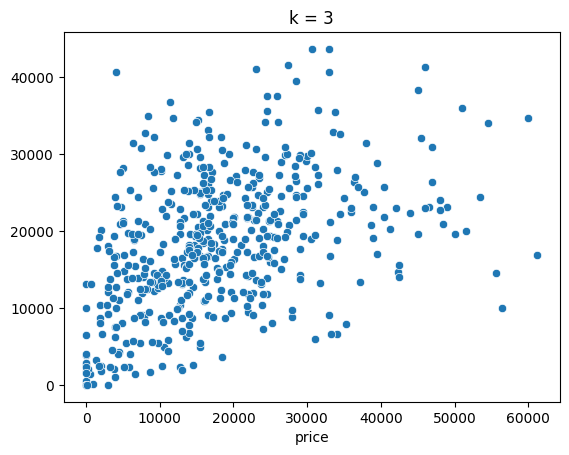

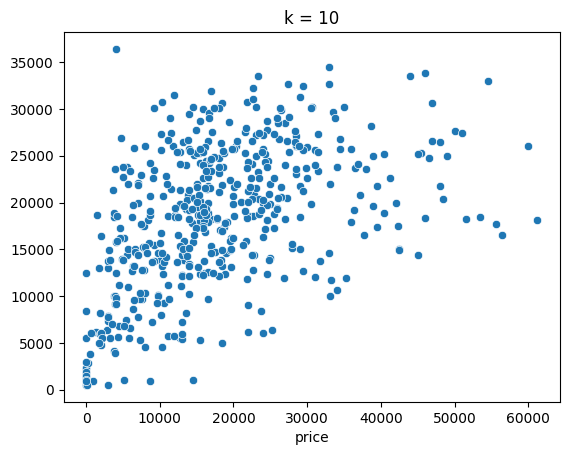

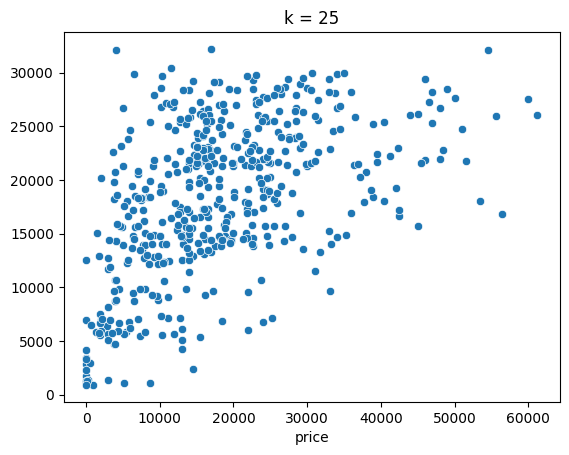

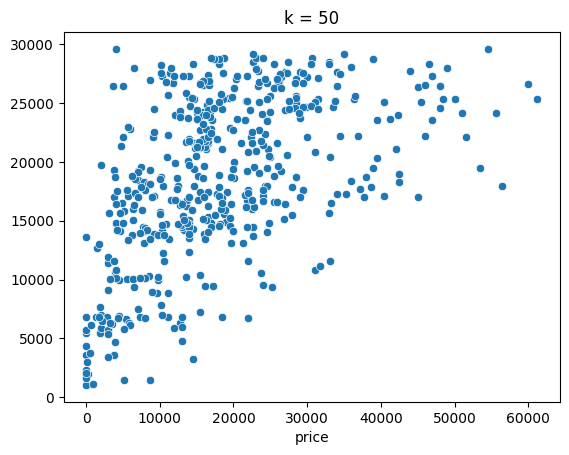

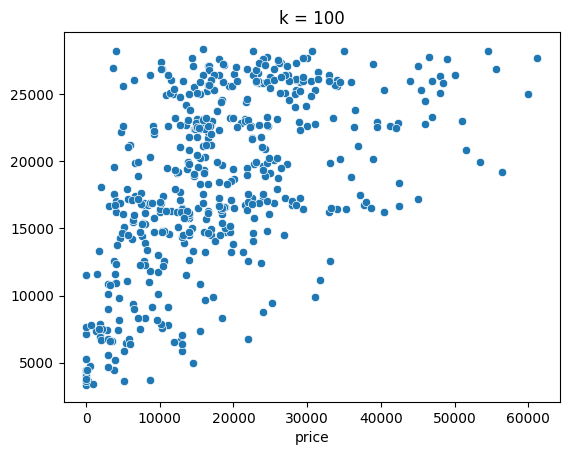

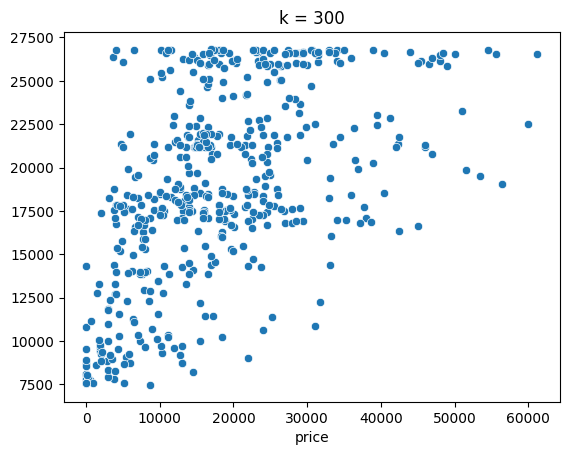

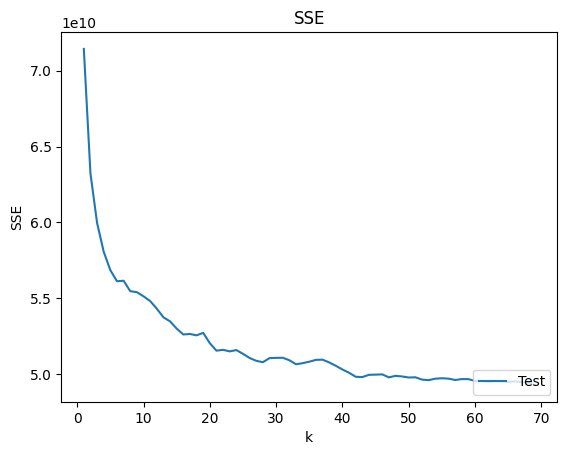

Optimal value of k: 69


In [80]:
#Question 2 part 1:
df = pd.read_csv('./assignment3/data/USA_cars_datasets.csv',low_memory=False)
df = df[['price','year','mileage']]
df['price'+'_nan'] = df["price"].isnull()
print('Total Missings: \n', sum(df["price"+'_nan']),'\n')

df['year'+'_nan'] = df["year"].isnull()
print('Total Missings: \n', sum(df["year"+'_nan']),'\n')

df['mileage'+'_nan'] = df["mileage"].isnull()
print('Total Missings: \n', sum(df["mileage"+'_nan']),'\n') #no missings
df.describe()
df.shape #2499 rows, 6 columns (but realistically 3 columns, just added price_nan, year_nan, and mileage_nan)
df.head()

#Question 2 part 2:
X = df[['year', 'mileage']]
# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)
X = X.apply(maxmin) # max-min normalization

#Question 2 part 3 and part 4:
from sklearn.model_selection import train_test_split
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100) #splitting into 80-20

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

k_val = [3,10,25,50,100,300]
SSE_val = [] #SSE for each value of k
for k in k_val:
    model = kNNRegression(n_neighbors=k)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE_test_val = np.sum((y_test - y_hat)**2)
    SSE_val.append(SSE_test_val)
    plot_df = pd.DataFrame({
        'Actual Values': y_test,
        'Predicted Values': y_hat,
    })
    this_plot = sns.scatterplot(data=plot_df,x=y_test,y=y_hat)
    plt.title(f"k = {k}")
    plt.show()
#As K grows larger, I notice that the graph is getting more steeper. It also seems like the scaling of the graphs become smaller and smaller as k increases.
#At the same time, it seems like the values of K are getting a bit more generalized and they seem to deviate from a line-like shape to more random and all over the place.
#Question 2 part 5:
k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar-1)
SSE_test = np.zeros(k_bar-1)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k-1] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k-1] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k

plt.plot(k_grid,SSE_test,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()
print(f"Optimal value of k: {k_star[0]}") #69 is the optimal value for k

#Question 2 part 6:
#As k varied for smaller values, we saw how in the predicted versus actual price graphs and in the graph from part 5 that it not only relied on some of the closer neighbors to make predictions but also the other random points. This makes them overfit: a more scatter pattern that could be less accurate. As we hit k = 69, we saw how our values struck the best generalization for the given test set. It was the optimal number. However, for larger k values, we saw that averaging smoothed out the predictions which, while make them stable, made them too generalized. This made them underfit again.


**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

In [110]:
#Question 3 part 1:
df = pd.read_csv('./assignment3/data/heart_failure_clinical_records_dataset.csv',low_memory=False)
df = df.drop(['time'], axis=1)
na_count = df.isnull().sum()
print(na_count)
#no missings in the data

#Question 3 part 2:
cm = df.corr()
dec = cm['DEATH_EVENT'].sort_values()
print(dec) #serum_creatinine, age, and ejection_fraction are all variables strongly associated with a death event

#Question 3 part 3:
var = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex','smoking']
df.groupby(var)['DEATH_EVENT'].describe()
#anemia and high blood pressure

#Question 3 part 4:
X = df[['anaemia', 'serum_creatinine', 'high_blood_pressure', 'age', 'ejection_fraction']]
y = df['DEATH_EVENT']

#Question 3 part 5:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)
X = X.apply(maxmin) # max-min normalization

#Question 3 part 6:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100) #splitting into 80-20

#Question 3 part 7:
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

k_bar = 70
k_grid = np.arange(1, k_bar)
SSE_train = np.zeros(k_bar-1)
SSE_test = np.zeros(k_bar-1)
for k in range(1, k_bar):
    model = kNNRegression(n_neighbors=k)
    fitted_model = model.fit(X_train, y_train)
    y_hat = fitted_model.predict(X_test)
    SSE_test[k-1] = np.sum((y_test - y_hat)**2)
    y_hat = fitted_model.predict(X_train)
    SSE_train[k-1] = np.sum((y_train - y_hat)**2)

SSE_min = np.min(SSE_test)
min_index = np.where(SSE_test == SSE_min)
k_star = k_grid[min_index]
print(k_star) # optimal number of neighbors is 8

#Question 3 part 8:
X_a = df
X_a = X_a.apply(maxmin)

X_atrain, X_atest, y_atrain, y_atest = train_test_split(X_a,y,test_size=.2,random_state=100) #splitting into 80-20

k_bar = 70
k_grid = np.arange(1, k_bar)
SSE_atrain = np.zeros(k_bar-1)
SSE_atest = np.zeros(k_bar-1)
for k in range(1, k_bar):
    model = kNNRegression(n_neighbors=k)
    fitted_model = model.fit(X_atrain, y_atrain)
    y_ahat = fitted_model.predict(X_atest)
    SSE_atest[k-1] = np.sum((y_atest - y_ahat)**2)
    y_ahat = fitted_model.predict(X_atrain)
    SSE_atrain[k-1] = np.sum((y_atrain - y_ahat)**2)

SSE_amin = np.min(SSE_atest)
amin_index = np.where(SSE_atest == SSE_amin)
ak_star = k_grid[amin_index]
print(ak_star) # optimal number of neighbors is 1, 2, or 3 neighbors. the min number is 1

print(SSE_min) #12.28125
print(SSE_amin) #0.0

#The second model has a lower SSE. I would prefer to use the first model beacause although it has a higher SSE number, it showcases that it performs errors. This may then be minimized if we add in more data as compared to performing unexpectedly for the 0.0 SSE for the second model. It is less likely to overfit and might generalize to data better.
# After playing around with the data, with lower k values, the second model increased as more variables dropped. It may be overfitting.
#More variables led to a lower SSE for the second model - but we also found that it could be overfitting at some times. So no, it is not always going to be a better option. Rather, choosing variables, like in the first model, that are relevant and necessary will be way better than anything else.




age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64
[8]
[1 2 3]
12.28125
0.0


**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?